In [2]:
pip install lightgbm#下载所需要的库

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'lightgbm#下载所需要的库'


In [1]:
pip install catboost#下载所需要的库

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'catboost#下载所需要的库'


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import lightgbm as lgb
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor, Pool
plt.rcParams['font.family'] = ['SimHei'] #用来显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

In [45]:
#用read_csv函数读取数据
data = pd.read_csv('C:/Users/cbyddr/Desktop/济南二手房.csv',skiprows=0,header=1)#数据集第一行为空行，skiprows跳过第一行，第二行为数据表列名。
#查看数据

print(data)

                                地址    户型        面积     单价     总价  关注度  \
0      精装小3室+育秀+南北通透+带地下室车位另算+看房方便  3室1厅   97.62平米  24381  238.0    4   
1       金科城  满五唯一 精装三室 边户 地铁1号线4号线  3室1厅  102.52平米  11608  119.0    0   
2           新上西江华府自住装修三室带车位地下室拎包入住  3室2厅  138.47平米  28888  400.0    1   
3                 金科城 高楼层 采光好 看房方便  3室1厅   100.9平米  10902  110.0    0   
4                 中建长清湖乐园 3室2厅 南 北  3室2厅     140平米   6072   85.0    0   
...                            ...   ...       ...    ...    ...  ...   
2965  满五唯一 有地下室 大平层 有院子  看房方便 一层一户  5室3厅  288.74平米  25283  730.0    6   
2966   历下区 绿景尚品东临 利农花园 3室朝阳户型 有地下室  3室2厅     153平米  19478  298.0    1   
2967             满五唯一，楼龄新，带地下室，配套全  3室2厅     125平米  18800  235.0   25   
2968        融创文旅城梧桐台四室两厅两卫毛坯有车位视野好  4室2厅  139.53平米  13976  195.0    3   
2969           胜利大街，育英，陪读房，单位宿舍，安静  3室2厅  116.43平米  18467  215.0   24   

         发布时间                                                 链接  
0     2个月以前发布  https://jn.lianjia.com/ershoufang/1031285

In [46]:
### 描述统计分析

In [47]:
#1.用read_csv函数读取数据
data = pd.read_csv('C:/Users/cbyddr/Desktop/济南二手房.csv',skiprows=0,header=1)#数据集第一行为空行，skiprows跳过第一行，第二行为数据表列名。
#查看数据
data

,地址,户型,面积,单价,总价,关注度,发布时间,链接
0,精装小3室+育秀+南北通透+带地下室车位另算+看房方便,3室1厅,97.62平米,24381,238.0,4,2个月以前发布,https://jn.lianjia.com/ershoufang/103128570531...
1,金科城 满五唯一 精装三室 边户 地铁1号线4号线,3室1厅,102.52平米,11608,119.0,0,7天以前发布,https://jn.lianjia.com/ershoufang/103129837402...
2,新上西江华府自住装修三室带车位地下室拎包入住,3室2厅,138.47平米,28888,400.0,1,7天以前发布,https://jn.lianjia.com/ershoufang/103129837894...
3,金科城 高楼层 采光好 看房方便,3室1厅,100.9平米,10902,110.0,0,4天以前发布,https://jn.lianjia.com/ershoufang/103129884745...
4,中建长清湖乐园 3室2厅 南 北,3室2厅,140平米,6072,85.0,0,14天以前发布,https://jn.lianjia.com/ershoufang/103129725645...
...,...,...,...,...,...,...,...,...
2965,满五唯一 有地下室 大平层 有院子 看房方便 一层一户,5室3厅,288.74平米,25283,730.0,6,4个月以前发布,https://jn.lianjia.com/ershoufang/103127519803...
2966,历下区 绿景尚品东临 利农花园 3室朝阳户型 有地下室,3室2厅,153平米,19478,298.0,1,一年前发布,https://jn.lianjia.com/ershoufang/103118627951...
2967,满五唯一，楼龄新，带地下室，配套全,3室2厅,125平米,18800,235.0,25,一年前发布,https://jn.lianjia.com/ershoufang/103114498364...
2968,融创文旅城梧桐台四室两厅两卫毛坯有车位视野好,4室2厅,139.53平米,13976,195.0,3,5个月以前发布,https://jn.lianjia.com/ershoufang/103126428903...


In [48]:
#2.统计缺失值数量
print(data.isnull().sum())

地址      0
户型      0
面积      0
单价      0
总价      0
关注度     0
发布时间    0
链接      0
dtype: int64


In [5]:
#3.设置二维数组表示爬取的数据集
arr1=np.array(data.columns)
print(arr1)
arr2=np.array(data.values)
print(arr2)

['地址' '户型' '面积' '单价' '总价' '关注度' '发布时间' '链接']
[['精装小3室+育秀+南北通透+带地下室车位另算+看房方便' '3室1厅' '97.62平米' ... 4 '2个月以前发布'
  'https://jn.lianjia.com/ershoufang/103128570531.html']
 ['金科城  满五唯一 精装三室 边户 地铁1号线4号线' '3室1厅' '102.52平米' ... 0 '7天以前发布'
  'https://jn.lianjia.com/ershoufang/103129837402.html']
 ['新上西江华府自住装修三室带车位地下室拎包入住' '3室2厅' '138.47平米' ... 1 '7天以前发布'
  'https://jn.lianjia.com/ershoufang/103129837894.html']
 ...
 ['满五唯一，楼龄新，带地下室，配套全' '3室2厅' '125平米' ... 25 '一年前发布'
  'https://jn.lianjia.com/ershoufang/103114498364.html']
 ['融创文旅城梧桐台四室两厅两卫毛坯有车位视野好' '4室2厅' '139.53平米' ... 3 '5个月以前发布'
  'https://jn.lianjia.com/ershoufang/103126428903.html']
 ['胜利大街，育英，陪读房，单位宿舍，安静' '3室2厅' '116.43平米' ... 24 '一年前发布'
  'https://jn.lianjia.com/ershoufang/103110328824.html']]


In [ ]:
###可视化处理分析

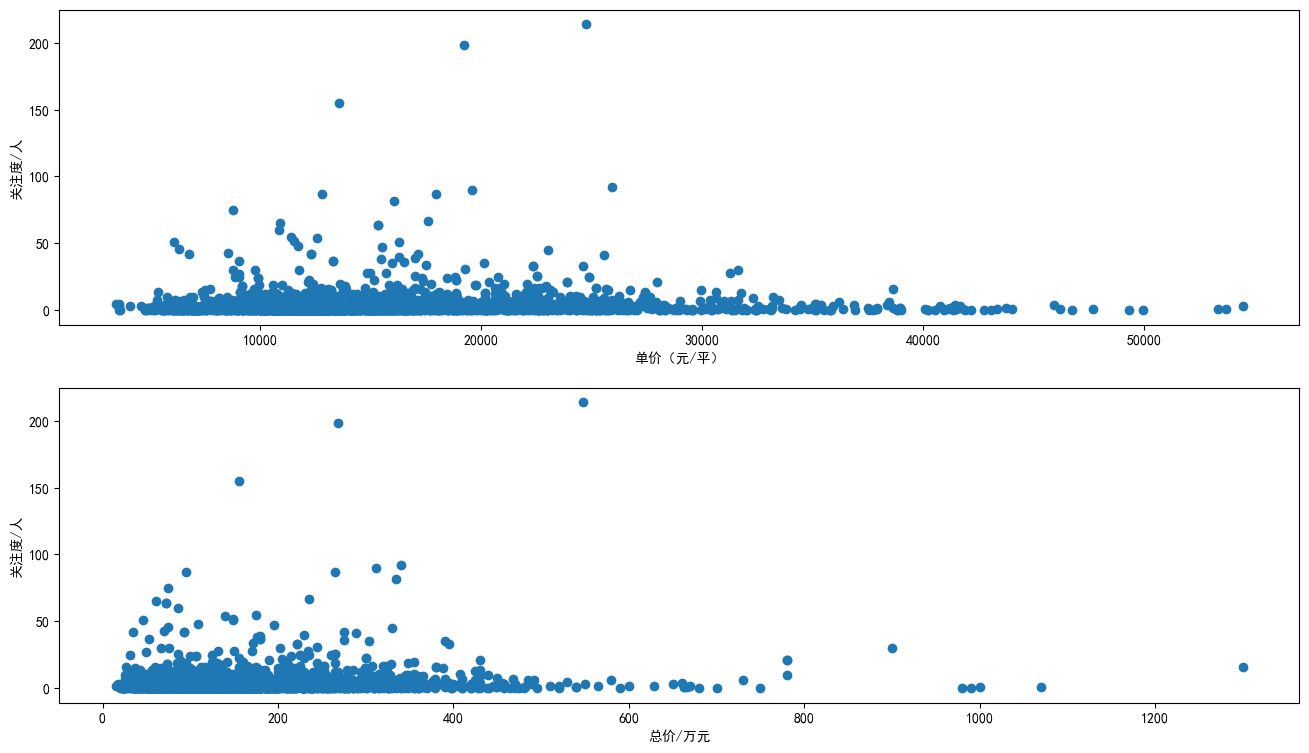

In [24]:
#1.散点图
# 绘制子图1

plt.figure(figsize=(16,9))
plt.rcParams['font.sans-serif'] = ['SimHei']  #设置中文显示
plt.subplot(2, 1, 1)  
plt.xlabel('单价（元/平）')
plt.ylabel('关注度/人')
plt.scatter(arr2[:,3],arr2[:,5],marker='o')

# 绘制子图2                            
plt.subplot(2, 1, 2)  
plt.xlabel('总价/万元')
plt.ylabel('关注度/人')
plt.scatter(arr2[:,4],arr2[:,5],marker='o')
    
# 展示图片
plt.show()


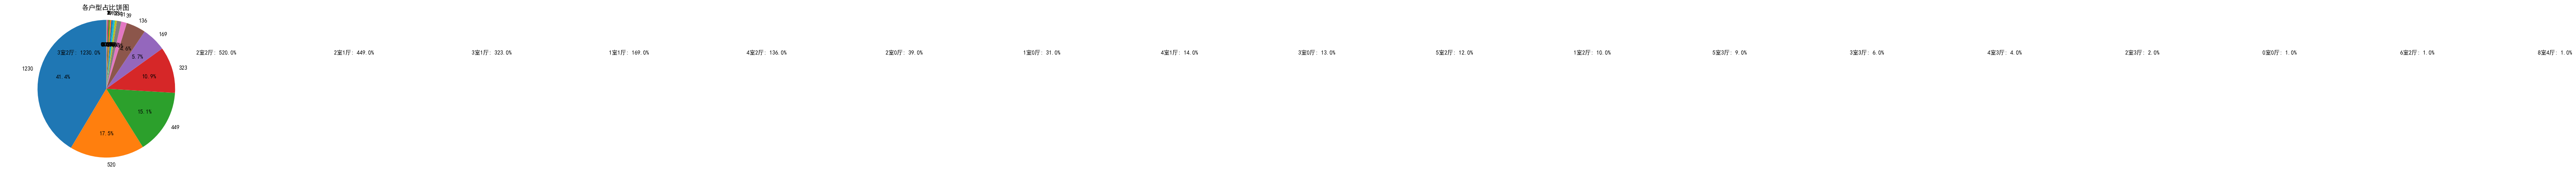

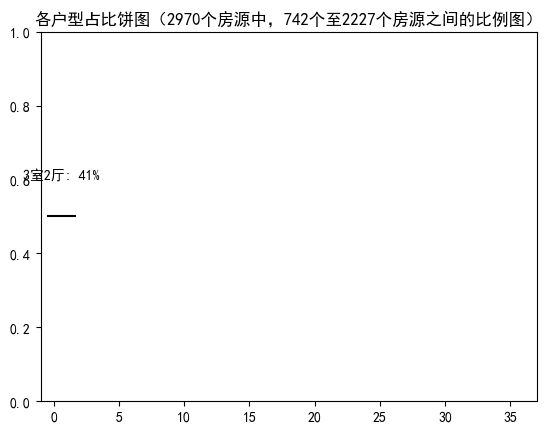

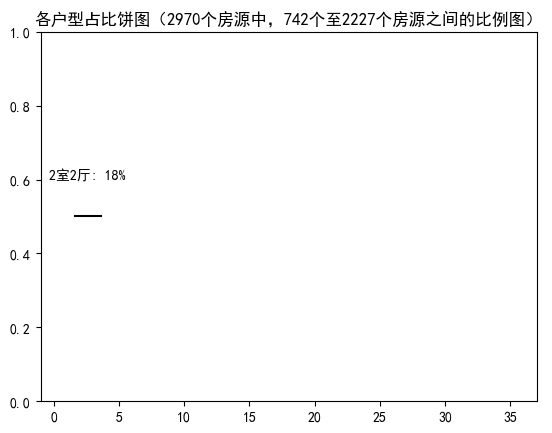

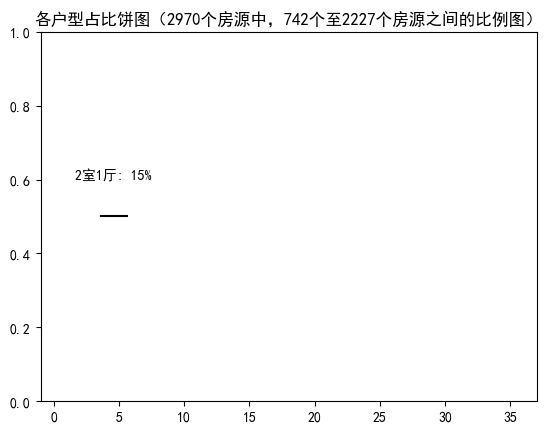

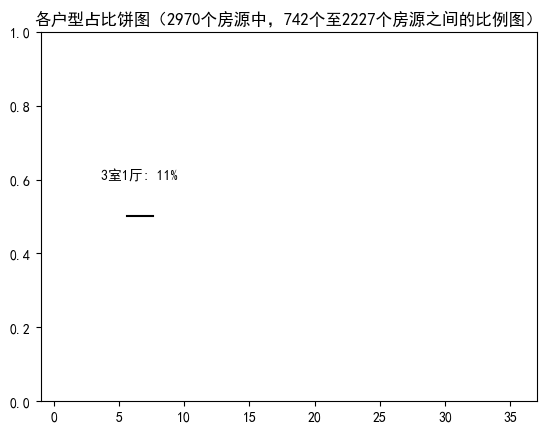

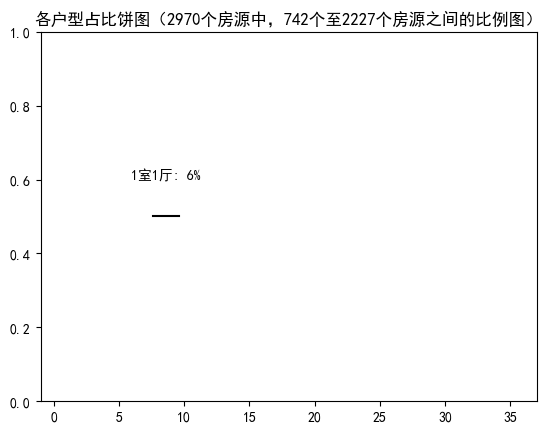

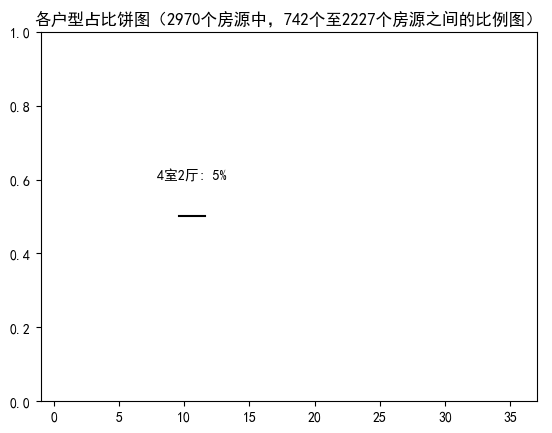

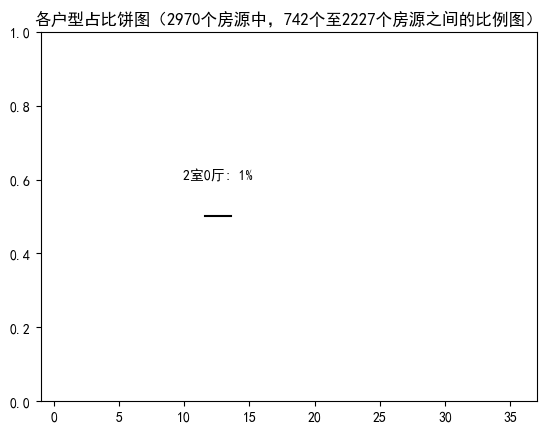

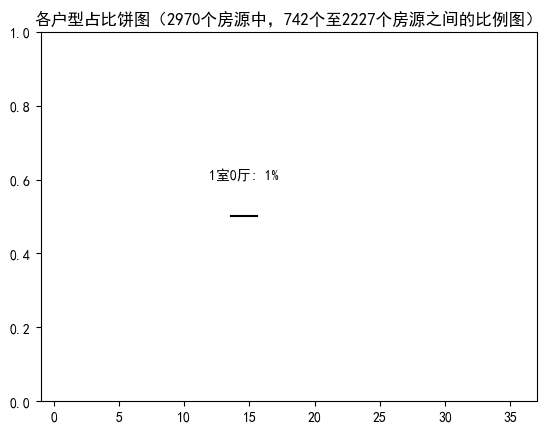

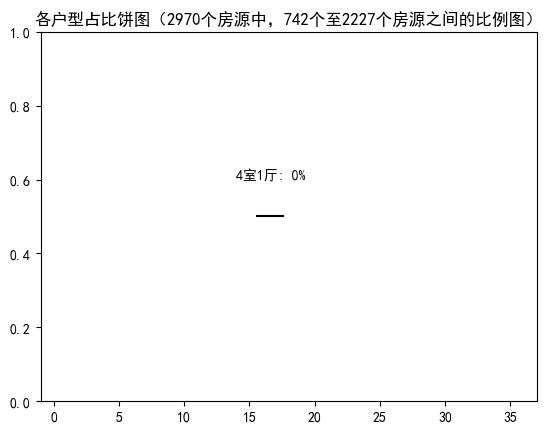

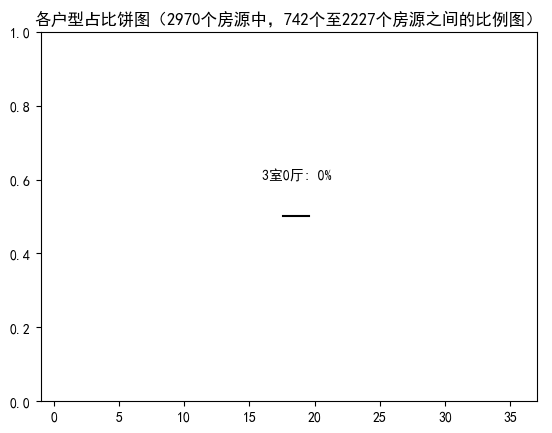

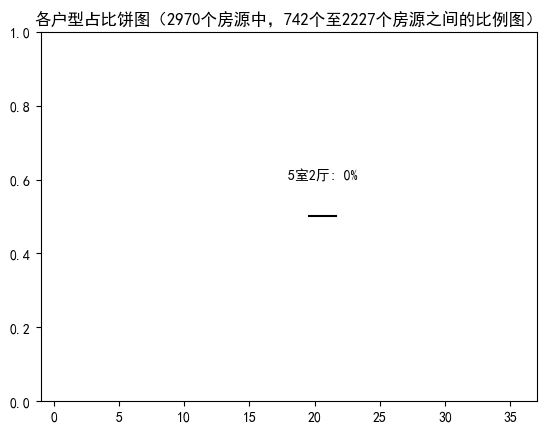

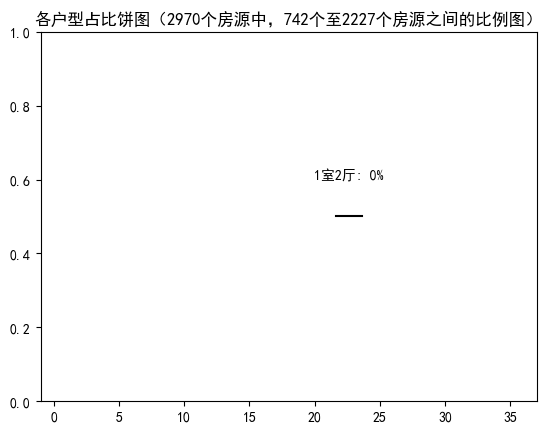

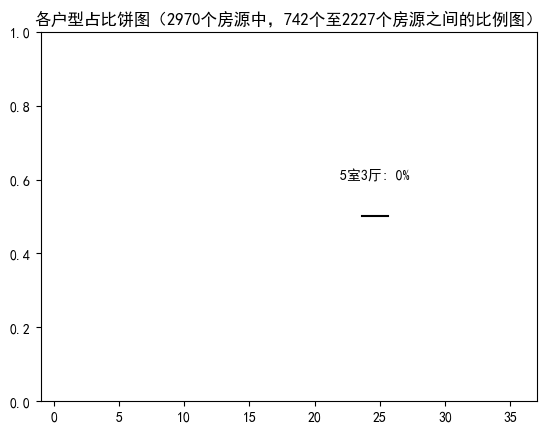

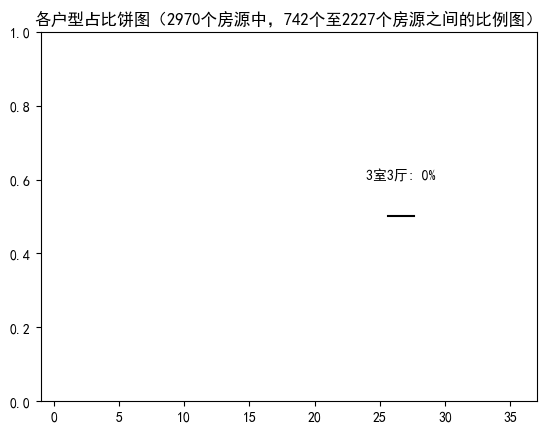

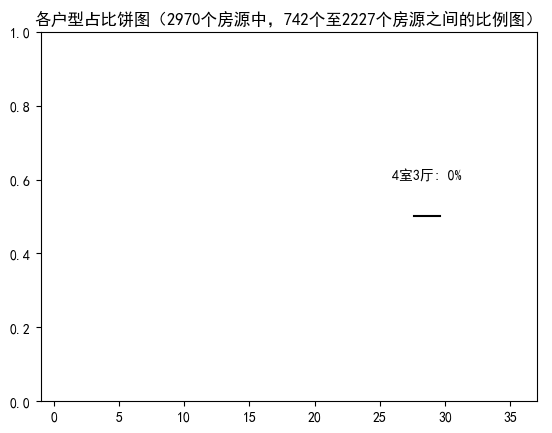

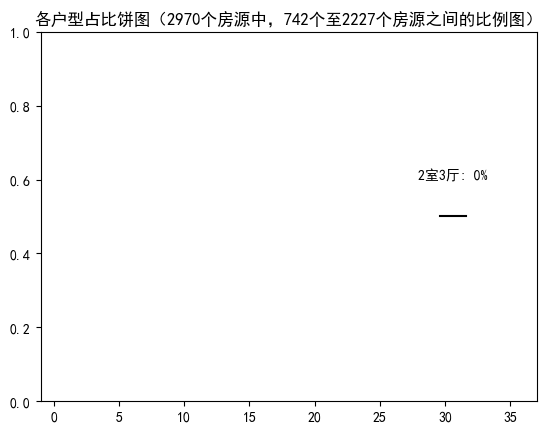

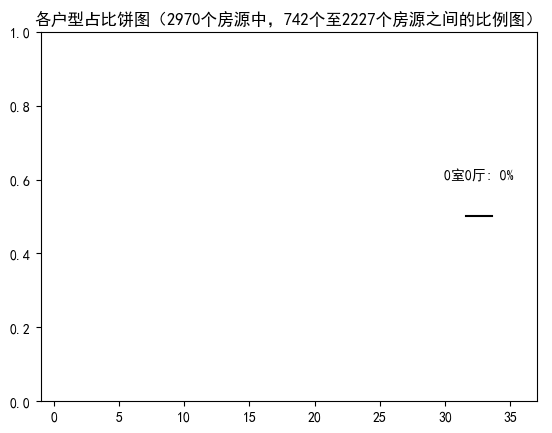

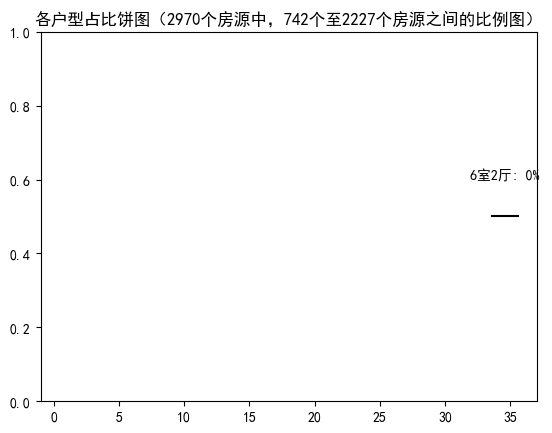

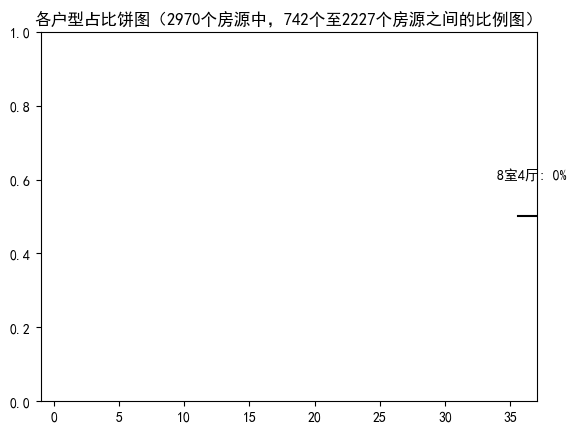

In [27]:
#2.使用饼图及其他统计图显示个户型占比信息
# 统计户型数量  
house_types = data['户型'].value_counts()  
  
# 计算总数量  
total = data['户型'].count()  
  
# 绘制饼图  
fig, ax = plt.subplots()  
ax.pie(house_types, labels=house_types, autopct='%1.1f%%', startangle=90, pctdistance=0.65)  #设置参数（精确到小数点后一位，
                                                                                             #饼图起始角度从正x轴开始）
ax.axis('equal')                                                                             # 使饼图保持圆形  
plt.title('各户型占比饼图')                                                                  # 添加标题  
  
# 添加每个户型及其占比的文本框  
for index, value in enumerate(house_types.index):  
    percent = f"{house_types[index]:.1f}"                                                   
    ax.text(index * 2 - 0.4, 0.5, f"{value}: {percent}%", ha="center")                       # 居中显示户型及其占比  
      
plt.show()  # 显示图形  
  
# 绘制横线及比例调整  
for index, value in enumerate(house_types.index):  
    percent = f"{house_types[index]/total*100:.0f}"                                # 计算占比并保留整数部分  
    plt.plot([index * 2 - 0.4, (index + 1) * 2 - 0.4], [0.5, 0.5], color='black')  # 绘制横线  
    plt.text((index + 0.5) * 2 - 0.4, 0.6, f"{value}: {percent}%", ha="center")    # 在横线上添加户型及其占比文本框  
    plt.ylim(0, 1)                                                                 # 调整y轴范围为0到1  
    plt.xlim(-1, len(house_types) * 2 - 1)                                         # 根据横线的位置调整x轴范围  
    plt.title(f'各户型占比饼图（{total}个房源中，{int(total*0.25)}个至{int(total*0.75)}个房源之间的比例图）')  # 根据横线的位置调整标题信息  
    plt.show()                                                                     # 显示调整后的图形

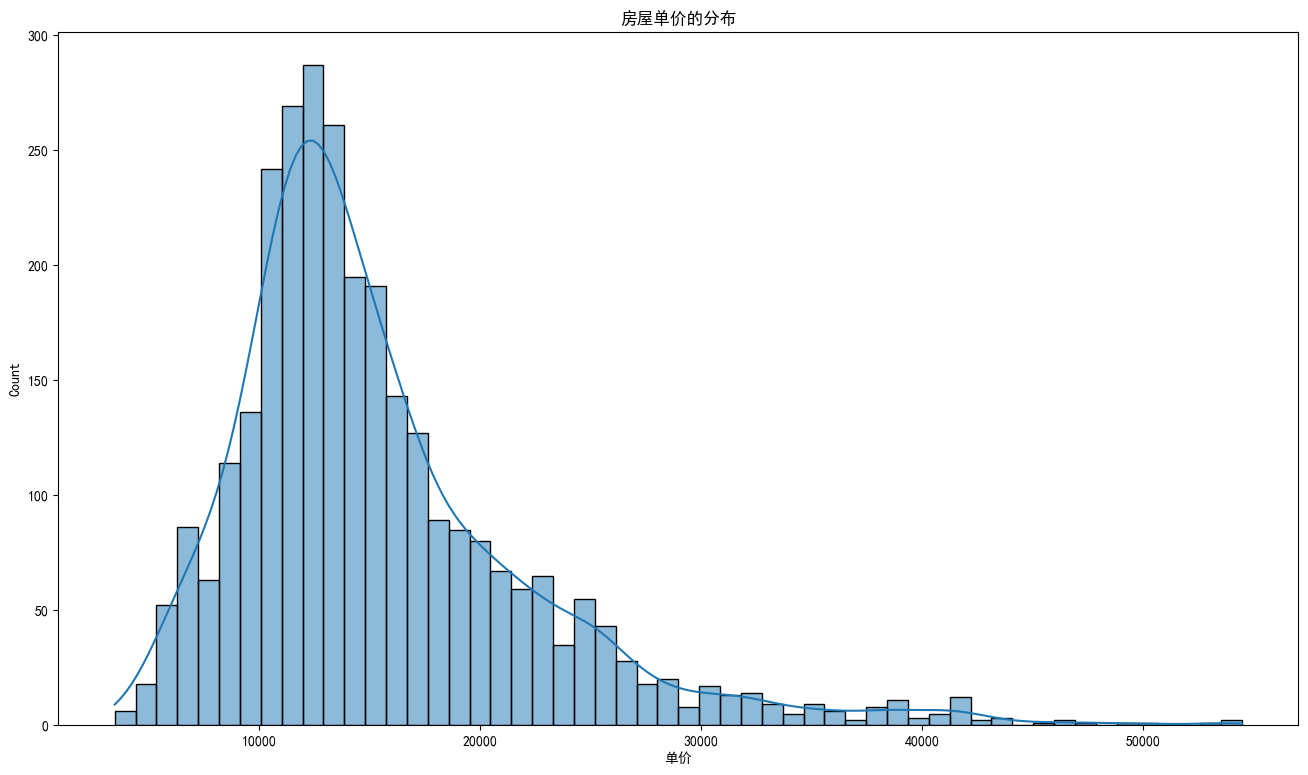

In [30]:
# 3.房屋单价分布可视化
plt.figure(figsize=(16,9))            #设置画布
sns.histplot(data['单价'], kde=True)  #绘制直方图
plt.title('房屋单价的分布')           #设置图表标题‘房屋单价的分布’
plt.show()

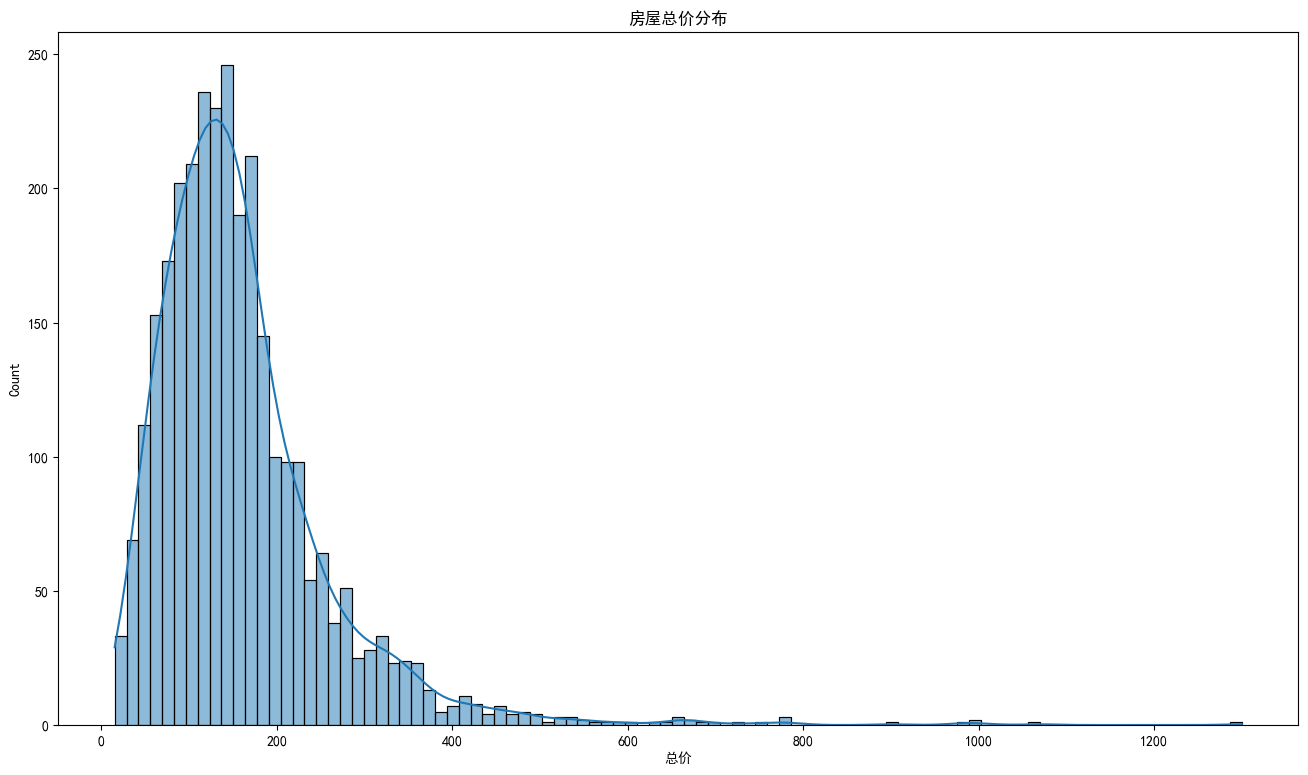

In [51]:
# 4.房屋总价分布可视化
plt.figure(figsize=(16,9))            #设置画布
sns.histplot(data['总价'], kde=True)  #绘制直方图
plt.title('房屋总价分布')             #设置图表标题'房屋总价分布'
plt.show()

In [52]:
###对数据进行预处理，取出某些列
data = pd.read_csv('C:/Users/cbyddr/Desktop/济南二手房.csv',skiprows=0,header=1)
data2 = data.iloc[:,1:6] #取出第一列到第六列
data2['户型'] = data2['户型'].apply(lambda x: ''.join(filter(str.isdigit, x))).astype(int) #将户型中的汉字去除，只保留数字，如3室1厅转化为31
data2['面积'] = data2['面积'].apply(lambda x: x[:-2]).astype(float)                        #将面积中的最后两个字'平米'删除，只保留数据
print(data2)                                                                               #打印输出data2（观察数据是否处理成功）

      户型      面积     单价     总价  关注度
0     31   97.62  24381  238.0    4
1     31  102.52  11608  119.0    0
2     32  138.47  28888  400.0    1
3     31  100.90  10902  110.0    0
4     32  140.00   6072   85.0    0
...   ..     ...    ...    ...  ...
2965  53  288.74  25283  730.0    6
2966  32  153.00  19478  298.0    1
2967  32  125.00  18800  235.0   25
2968  42  139.53  13976  195.0    3
2969  32  116.43  18467  215.0   24

[2970 rows x 5 columns]


In [50]:
###机器学习方法训练测试数据集
X = data2.drop('总价',axis=1)  # 特征变量   # 假设 '总价' 是目标变量
y = data2['总价']  # 目标变量

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 划分训练集和测试集
#X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1])).astype(float)
# 设置LGBM回归器
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=1000,
    early_stopping_rounds=100,
    verbose=1)

# 训练模型
lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# 预测测试集
y_pred = lgb_model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 2376, number of used features: 4
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Start training from score 159.155947
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[189]	valid_0's l2: 195.221
Mean Squared Error: 195.2209290402656


   户型      面积     单价     总价  关注度
0  31   97.62  24381  238.0    4
1  31  102.52  11608  119.0    0
2  32  138.47  28888  400.0    1
3  31  100.90  10902  110.0    0
4  32  140.00   6072   85.0    0
5  22   85.00  10589   90.0    0
6  31   95.43  12785  122.0    2
7  21   70.84   9600   68.0    1
8  22  107.70  15785  170.0    0
9  22  102.73  14602  150.0    0


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, '户型'),
  Text(0, 1.5, '面积'),
  Text(0, 2.5, '单价'),
  Text(0, 3.5, '总价'),
  Text(0, 4.5, '关注度')])

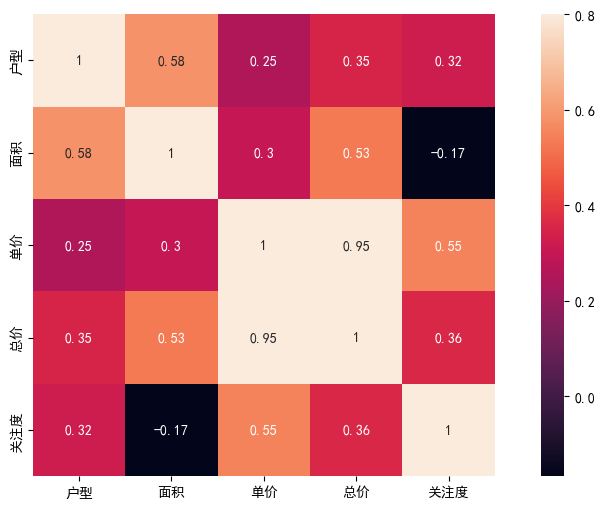

In [42]:
#取出前十行数据，绘制热力图
top_10 = data2.head(10)
print(top_10)
corr = top_10.corr()
corr
ax = plt.subplots(figsize=(12, 6))#调整画布大小
ax = sns.heatmap(corr, vmax=.8, square=True, annot=True)#绘制热力图，设置最大值参数为0.8
# 设置刻度字体大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

    户型      面积     单价     总价  关注度
0   31   97.62  24381  238.0    4
1   31  102.52  11608  119.0    0
2   32  138.47  28888  400.0    1
3   31  100.90  10902  110.0    0
4   32  140.00   6072   85.0    0
..  ..     ...    ...    ...  ...
95  32  107.74  11603  125.0    1
96  32  154.22  24511  378.0    6
97  32   93.28  13187  123.0    1
98  32   97.09  20600  200.0    6
99  42  160.45  24619  395.0   33

[100 rows x 5 columns]


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, '户型'),
  Text(0, 1.5, '面积'),
  Text(0, 2.5, '单价'),
  Text(0, 3.5, '总价'),
  Text(0, 4.5, '关注度')])

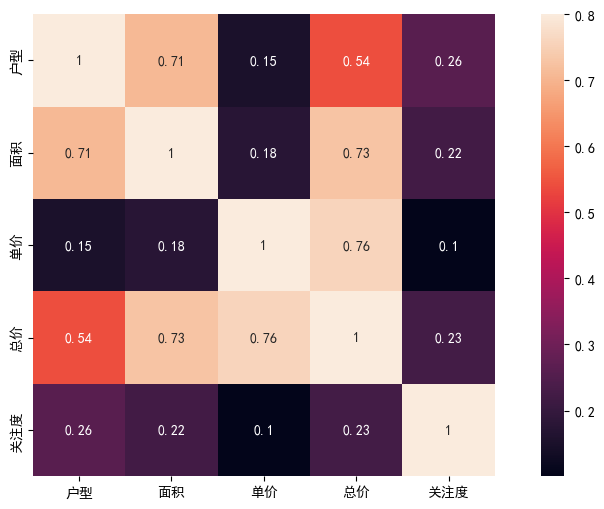

In [41]:
#取出前一百行数据，绘制热力图
top_100 = data2.head(100)
print(top_100)
corr = top_100.corr()
corr
ax = plt.subplots(figsize=(12, 6))#调整画布大小
ax = sns.heatmap(corr, vmax=.8, square=True, annot=True)#绘制热力图，设置最大值参数为0.8
# 设置刻度字体大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, '户型'),
  Text(0, 1.5, '面积'),
  Text(0, 2.5, '单价'),
  Text(0, 3.5, '总价'),
  Text(0, 4.5, '关注度')])

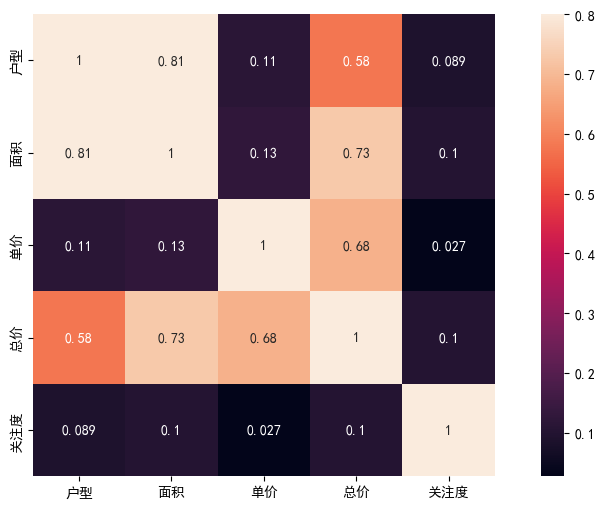

In [43]:
#利用处理完的数据集data2绘制热力图
corr = data2.corr()
corr
ax = plt.subplots(figsize=(12, 6))                       
ax = sns.heatmap(corr, vmax=.8, square=True, annot=True)

plt.xticks(fontsize=10)       # 设置刻度字体大小
plt.yticks(fontsize=10)